In [1]:
import pandas as pd
import json
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pprint as pp
from sklearn.linear_model import LinearRegression
from pandas.io.json import json_normalize
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.patches as mpatches

In [2]:
APIyelp = "PnCaCClu_oaMrigxA4QIQILSm_-IZtvKAJur803egyHClYLF1A93_cEYvgBY8Na2fpa65VSTjDtofak2coDyz3iUCQHuhL6Y3rRN6mnfIBzRhgKLu5bwmzq6A_8CYXYx"

In [3]:
table1 = pd.read_csv("hispanicData.csv")
table1.head()


,Unnamed: 0,code,total_POP,nonHispanic_POP,latitude,longitude,NAME,Hispanic_POP,Percent_Hispanic
0,0,AK,731545,678333,63.588753,-154.493062,Alaska,53212,0.072739
1,1,AL,4903185,4679907,32.318231,-86.902298,Alabama,223278,0.045537
2,2,AR,3017804,2781173,35.201050,-91.831833,Arkansas,236631,0.078412
3,3,AZ,7278717,4968127,34.048928,-111.093731,Arizona,2310590,0.317445
4,4,CA,39512223,23937343,36.778261,-119.417932,California,15574880,0.394179


In [4]:
states = table1["NAME"].tolist()
states

['Alaska',
 'Alabama',
 'Arkansas',
 'Arizona',
 'California',
 'Colorado',
 'Connecticut',
 'District of Columbia',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Iowa',
 'Idaho',
 'Illinois',
 'Indiana',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Massachusetts',
 'Maryland',
 'Maine',
 'Michigan',
 'Minnesota',
 'Missouri',
 'Mississippi',
 'Montana',
 'North Carolina',
 'North Dakota',
 'Nebraska',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'Nevada',
 'New York',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Virginia',
 'Vermont',
 'Washington',
 'Wisconsin',
 'West Virginia',
 'Wyoming']

In [5]:
MexicanRestaurants = list()

for state in states:
    headers = {'authorization': 'Bearer {}'.format(APIyelp)}
    search_api_url = 'https://api.yelp.com/v3/businesses/search'
    params = {  'term': 'mexican',
                'location': state,
                'limit': 50
            }
    r =requests.get(search_api_url, headers=headers, params=params, timeout=5)
    data = json.loads(r.text)
  

    MexicanRestaurants.append(data)

TotalMexicanRestaurants = MexicanRestaurants


In [6]:
# MexicanRestaurants = list()
# restaurantsDict = {
#     "name": [],
#     "latitude": [],
#     "longitude": [],
#     "rating": [],
#     "state": []
# }

# for i,state in enumerate(states):
#     headers = {'authorization': 'Bearer {}'.format(APIyelp)}
#     search_api_url = 'https://api.yelp.com/v3/businesses/search'
#     params = {  'term': 'mexican',
#                 'location': state,
#                 'limit': 2
#             }
#     r = requests.get(search_api_url, headers=headers, params=params, timeout=5)
#     x = r.json()
#     MexicanRestaurants = x
#     for i, restaurants in enumerate(MexicanRestaurants[0]["businesses"]):
#         restaurantsDict["name"].append(MexicanRestaurants[0]["businesses"][i]["name"])
#         restaurantsDict["latitude"].append(MexicanRestaurants[0]["businesses"][i]["coordinates"]["latitude"])
#         restaurantsDict["longitude"].append(MexicanRestaurants[0]["businesses"][i]["coordinates"]["longitude"])
#         restaurantsDict["rating"].append(MexicanRestaurants[0]["businesses"][i]["rating"])
#         restaurantsDict["state"].append(MexicanRestaurants[0]["businesses"][i]["location"]["state"])

    



In [7]:
with open('restaurants.txt', 'w') as outfile:
    json.dump(TotalMexicanRestaurants, outfile)


In [8]:
restaurantsDict = {
    "nameRest": [],
    "latitudeRest": [],
    "longitudeRest": [],
    "rating": [],
    "code": []
}

for n in range(0,51):
    for i, restaurants in enumerate(MexicanRestaurants[n]["businesses"]):
        restaurantsDict["nameRest"].append(MexicanRestaurants[n]["businesses"][i]["name"])
        restaurantsDict["latitudeRest"].append(MexicanRestaurants[n]["businesses"][i]["coordinates"]["latitude"])
        restaurantsDict["longitudeRest"].append(MexicanRestaurants[n]["businesses"][i]["coordinates"]["longitude"])
        restaurantsDict["rating"].append(MexicanRestaurants[n]["businesses"][i]["rating"])
        restaurantsDict["code"].append(MexicanRestaurants[n]["businesses"][i]["location"]["state"])

    


In [9]:
restaurantsDF = pd.DataFrame.from_dict(restaurantsDict)
# restaurantsDF['rating'] = restaurantsDF['rating'].astype(float)
restaurantsDF.head(20)

,nameRest,latitudeRest,longitudeRest,rating,code
0,El Dorado,61.181370,-149.868480,4.5,AK
1,Serrano's Mexican Grill,61.195575,-149.880023,4.0,AK
2,Tequila 61,61.218568,-149.890711,4.0,AK
3,Pancho's Villa,61.192036,-149.906479,4.0,AK
4,Xalos Mexican Grill,61.220093,-149.819332,4.0,AK
5,El Jefe Taco Joint,61.174022,-149.882671,4.5,AK
6,Seoul Casa,61.145622,-149.869215,4.5,AK
7,Clandestino,61.218637,-149.877784,4.5,AK
8,Pedro's Mexican Grill,61.206957,-149.807691,4.5,AK
9,El Green-Go's,61.218552,-149.904349,4.5,AK


In [10]:
hispData = pd.read_csv("hispanicData.csv")
# hispData['Percent_Hispanic'] = hispData['Percent_Hispanic'].astype(float)
hispData.head()

,Unnamed: 0,code,total_POP,nonHispanic_POP,latitude,longitude,NAME,Hispanic_POP,Percent_Hispanic
0,0,AK,731545,678333,63.588753,-154.493062,Alaska,53212,0.072739
1,1,AL,4903185,4679907,32.318231,-86.902298,Alabama,223278,0.045537
2,2,AR,3017804,2781173,35.201050,-91.831833,Arkansas,236631,0.078412
3,3,AZ,7278717,4968127,34.048928,-111.093731,Arizona,2310590,0.317445
4,4,CA,39512223,23937343,36.778261,-119.417932,California,15574880,0.394179


In [11]:

merge1 = pd.merge(hispData, restaurantsDF, on="code")

merge1.head()
# merge1.to_csv("all_data.csv")

,Unnamed: 0,code,total_POP,nonHispanic_POP,latitude,longitude,NAME,Hispanic_POP,Percent_Hispanic,nameRest,latitudeRest,longitudeRest,rating
0,0,AK,731545,678333,63.588753,-154.493062,Alaska,53212,0.072739,El Dorado,61.181370,-149.868480,4.5
1,0,AK,731545,678333,63.588753,-154.493062,Alaska,53212,0.072739,Serrano's Mexican Grill,61.195575,-149.880023,4.0
2,0,AK,731545,678333,63.588753,-154.493062,Alaska,53212,0.072739,Tequila 61,61.218568,-149.890711,4.0
3,0,AK,731545,678333,63.588753,-154.493062,Alaska,53212,0.072739,Pancho's Villa,61.192036,-149.906479,4.0
4,0,AK,731545,678333,63.588753,-154.493062,Alaska,53212,0.072739,Xalos Mexican Grill,61.220093,-149.819332,4.0


<AxesSubplot:xlabel='Percent_Hispanic', ylabel='rating'>

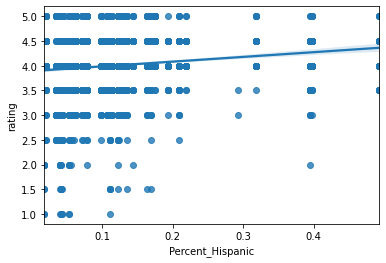

In [12]:
sns.regplot(x = "Percent_Hispanic", y = "rating", data = merge1)

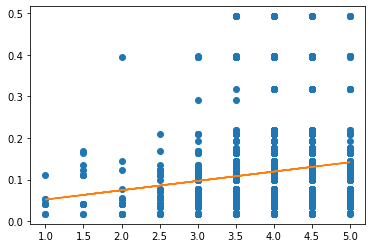

In [13]:
x = merge1["rating"]
y = merge1["Percent_Hispanic"]

plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)


In [14]:
correlation_matrix = np.corrcoef(x, y)

correlation_xy = correlation_matrix[0,1]

r_squared = correlation_xy**2


print(r_squared)

0.021423489904744634


In [15]:
avgRatingsDF = merge1.groupby("code", as_index=False)["rating"].mean()

merge2 = pd.merge(avgRatingsDF, table1, on ="code")

merge2.head()
# merge2.to_csv("all_data.csv")

,code,rating,Unnamed: 0,total_POP,nonHispanic_POP,latitude,longitude,NAME,Hispanic_POP,Percent_Hispanic
0,AK,3.93,0,731545,678333,63.588753,-154.493062,Alaska,53212,0.072739
1,AL,4.14,1,4903185,4679907,32.318231,-86.902298,Alabama,223278,0.045537
2,AR,4.05,2,3017804,2781173,35.201050,-91.831833,Arkansas,236631,0.078412
3,AZ,4.32,3,7278717,4968127,34.048928,-111.093731,Arizona,2310590,0.317445
4,CA,4.02,4,39512223,23937343,36.778261,-119.417932,California,15574880,0.394179


r_squared = 0.07896195323804185
Ttest_indResult(statistic=-93.28236905074165, pvalue=1.8751523897698847e-94)


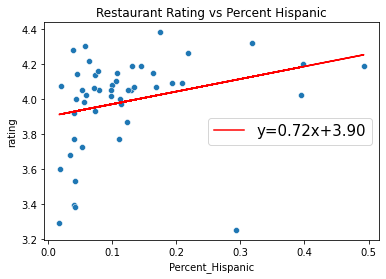

In [20]:
x = merge2["Percent_Hispanic"]
y = merge2["rating"]

ax = sns.scatterplot(x = "Percent_Hispanic", y = "rating", data = merge2)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
ax = plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
ax = plt.legend(fontsize=15)
ax = plt.title("Restaurant Rating vs Percent Hispanic")

correlation_matrix = np.corrcoef(x, y)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(f"r_squared = {r_squared}")
print(ttest_ind(x,y))

plt.savefig('rating by percent hispanic.jpg')

In [17]:
x = merge2["Percent_Hispanic"]
y = merge2["rating"]

correlation_matrix = np.corrcoef(x, y)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(r_squared)

print(ttest_ind(x,y))

0.07896195323804185
Ttest_indResult(statistic=-93.28236905074165, pvalue=1.8751523897698847e-94)


In [30]:
averageRatingTable = merge2.filter(['code','rating',"Percent_Hispanic"]).copy()
averageRatingTable.to_csv("averageRatingTable.csv")

html = averageRatingTable.to_html()

text_file = open("averageRatingTable.html", "w")
text_file.write(html)
text_file.close()

In [19]:
restaurantsDF.to_csv("restaurantsDF.csv")
restaurantsDF.head()



,nameRest,latitudeRest,longitudeRest,rating,code
0,El Dorado,61.181370,-149.868480,4.5,AK
1,Serrano's Mexican Grill,61.195575,-149.880023,4.0,AK
2,Tequila 61,61.218568,-149.890711,4.0,AK
3,Pancho's Villa,61.192036,-149.906479,4.0,AK
4,Xalos Mexican Grill,61.220093,-149.819332,4.0,AK
